<a href="https://colab.research.google.com/github/rdcn93/UPC_PI2_Model/blob/main/UPC_PI2_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DE LOS DATOS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings 
import seaborn as sns
filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

# **1. Lectura de los datos**

In [ ]:
data = pd.read_excel("/content/Report_2020_to_July_2022.xlsx", parse_dates=["FECHA"], 
                             dtype = { "PRODUCTO":"str", "ITEM":"int32","CANTIDAD":"float32"
                             ,"PRECIO_UNITARIO":"float32","SUBTOTAL":"float32","IGV":"float32","TOTAL":"float32" })

In [ ]:
data = data[["FECHA","ITEM","PRODUCTO","PRECIO_UNITARIO", "SUBTOTAL", "IGV", "TOTAL", "CANTIDAD"]]

In [ ]:
data.head()

,FECHA,ITEM,PRODUCTO,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD
0,2020-01-01,1,ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO,160.000,296.501,53.369,349.871,2.187
1,2020-01-01,2,HIGADO DE RES CONGELADO ST HELLEN,6.000,1016.539,182.974,1199.513,199.919
2,2020-01-02,3,ENTRAÃA FINA ANGUS CHOICE U.S.A. CON PIEL,115.000,2294.744,413.046,2707.790,23.546
3,2020-01-02,4,PICAÃA ANGUS CHOICE U.S.A.,80.000,373.280,67.189,440.469,5.506
4,2020-01-02,5,VACIO BLACK WAGYU U.S.A SRF,220.000,919.560,165.518,1085.078,4.932


In [ ]:
data["PRODUCTO"].unique()

array(['ENTRAÃ\x91A FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO',
       'HIGADO DE RES CONGELADO ST HELLEN',
       'ENTRAÃ\x91A FINA ANGUS CHOICE U.S.A. CON PIEL',
       'PICAÃ\x91A ANGUS CHOICE U.S.A.', 'VACIO BLACK WAGYU U.S.A SRF',
       'BIFE ANCHO ARG', 'COLITA DE CUADRIL ANGUS CHOICE U.S.A.',
       'FLANK STEAK BLACK WAGYU U.S.A. SRF',
       'CHORIZO MERMELADA DE ROCOTO 500 GR', 'CHORIZO PARRILLERO 500 GR',
       'BIFE ANGOSTO ARG',
       'ENTRAÃ\x91A FINA ANGUS CHOICE U.S.A PORCIONADO',
       'PORTERHOUSE ANGUS U.S.A.',
       'BIFE ANCHO CON HUESO ANGUS HIGH CHOICE U.S.A',
       'ENTRAÃ\x91A FINA ANGUS HIGH CHOICE U.S.A. CON PIEL',
       'OUTSIDE WAGYU U.S.A SRF', 'CHUCK TAIL FLAP WAGYU U.S.A. SRF',
       'VACIO ANGUS CHOICE U.S.A.', 'ZABUTON BLACK WAGYU U.S.A.',
       'BIFE ANCHO ANGUS HIGH CHOICE U.S.A',
       'ZABUTON GOLD WAGYU U.S.A. SRF',
       'BIFE ANGOSTO ANGUS HIGH CHOICE U.S.A', 'MORCILLA VASCA 500 GR',
       'TECNOPOR', 'CHUCK TAIL FLAP ANGUS  U.S.A.',


In [ ]:
data.describe()

,ITEM,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD
count,2697.000,2697.000,2697.000,2697.000,2697.000,2697.000
mean,1349.000,130.103,1559.030,280.620,1839.650,21.309
std,778.701,86.449,2935.185,528.324,3463.509,41.665
min,1.000,6.000,45.117,8.121,53.238,0.667
25%,675.000,80.000,314.779,56.659,371.438,2.907
50%,1349.000,99.000,575.730,103.630,679.360,7.874
75%,2023.000,160.000,1385.026,249.300,1634.326,18.478
max,2697.000,410.000,18904.135,3402.682,22306.816,212.582


# **2. Análisis Exploratorio EDA**

## **2.1 Busqueda de valores faltantes**

In [ ]:
#@title funciones de graficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])
    
  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)
  
  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(10,15))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(6,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)
  
  

  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(6,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(6,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
          Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0            FECHA            2697            0    0.000
1             ITEM            2697            0    0.000
2         PRODUCTO            2697            0    0.000
3  PRECIO_UNITARIO            2697            0    0.000
4         SUBTOTAL            2697            0    0.000
5              IGV            2697            0    0.000
6            TOTAL            2697            0    0.000
7         CANTIDAD            2697            0    0.000
********************************************************************** Graficas de datos faltantes **********************************************************************
*********************************************************

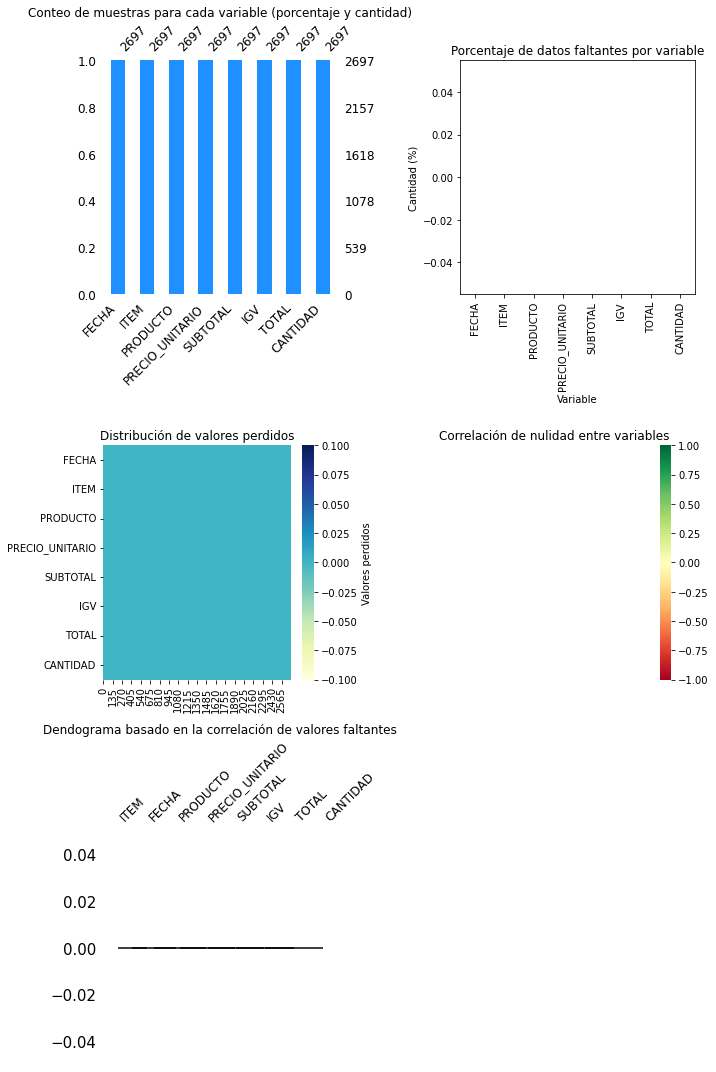

In [ ]:
report_missings(data)

Análisis: Todos los registros están completos y no se reportan al menos de forma inicial algún dato faltante. Ahora falta analizar en función de la **fecha**

In [ ]:
data.head()

,FECHA,ITEM,PRODUCTO,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD
0,2020-01-01,1,ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO,160.000,296.501,53.369,349.871,2.187
1,2020-01-01,2,HIGADO DE RES CONGELADO ST HELLEN,6.000,1016.539,182.974,1199.513,199.919
2,2020-01-02,3,ENTRAÃA FINA ANGUS CHOICE U.S.A. CON PIEL,115.000,2294.744,413.046,2707.790,23.546
3,2020-01-02,4,PICAÃA ANGUS CHOICE U.S.A.,80.000,373.280,67.189,440.469,5.506
4,2020-01-02,5,VACIO BLACK WAGYU U.S.A SRF,220.000,919.560,165.518,1085.078,4.932


In [ ]:
data.FECHA.describe(datetime_is_numeric=True)

count                             2697
mean     2021-04-19 14:36:42.447163648
min                2020-01-01 00:00:00
25%                2020-08-31 00:00:00
50%                2021-04-20 00:00:00
75%                2021-12-12 00:00:00
max                2022-07-30 00:00:00
Name: FECHA, dtype: object

Observación: Los datos se distribuyen del 1 de enero del 2020 al 30 de julio del 2022

In [ ]:
def get_fechas_faltantes(data_fechas, fecha_ini, fecha_fin, freq = "D"):
  fechas_tot = pd.date_range(start =fecha_ini, end = fecha_fin, freq=freq)
  fechas_diff = fechas_tot.difference(data_fechas)
  tam_fech_t = len(fechas_tot)
  tam_fech_e = len(fechas_diff)

  print(f"Deben haber en total: {tam_fech_t} fechas.")

  if tam_fech_t-tam_fech_e == 0:
    print(f"No hay Fechas faltantes")
  else:
    print(f"Existen {tam_fech_e} fechas faltantes.")
    print(f"Las fechas que faltan son: \n {fechas_diff}")

def get_fechas_duplicados(data):
  return data.duplicated(keep=False).sum()

In [ ]:
fechas_faltantes = get_fechas_faltantes(data.FECHA, "2020-01-01 00:00:00", "2022-07-30 00:00:00", "D")

Deben haber en total: 942 fechas.
Existen 53 fechas faltantes.
Las fechas que faltan son: 
 DatetimeIndex(['2020-01-06', '2020-01-11', '2020-01-17', '2020-02-04',
               '2020-02-26', '2020-04-17', '2020-04-29', '2020-06-27',
               '2020-08-09', '2020-08-17', '2020-08-25', '2020-09-09',
               '2020-09-25', '2020-10-09', '2020-10-28', '2020-11-01',
               '2020-11-04', '2020-11-27', '2020-12-28', '2021-01-14',
               '2021-01-24', '2021-02-09', '2021-02-15', '2021-02-17',
               '2021-02-26', '2021-03-03', '2021-03-13', '2021-04-03',
               '2021-04-14', '2021-05-12', '2021-05-20', '2021-05-22',
               '2021-05-28', '2021-06-09', '2021-06-11', '2021-07-16',
               '2021-08-03', '2021-08-15', '2021-09-05', '2021-09-20',
               '2021-10-12', '2021-11-14', '2021-11-18', '2021-11-21',
               '2021-12-24', '2022-01-02', '2022-03-31', '2022-05-25',
               '2022-06-05', '2022-06-28', '2022-07-19',

In [ ]:
get_fechas_duplicados(data)

0

**Observación**: 
Hay  53 fechas faltantes al organizar los registros por día. Lo bueno es que no existen registros duplicados.

**Graficando las ventas**

In [ ]:
data.loc[data.FECHA == "2020-01-01"]

,FECHA,ITEM,PRODUCTO,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD
0,2020-01-01,1,ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO,160.000,296.501,53.369,349.871,2.187
1,2020-01-01,2,HIGADO DE RES CONGELADO ST HELLEN,6.000,1016.539,182.974,1199.513,199.919


In [ ]:
df_ventas_day = data.groupby(["FECHA"]).sum()
df_ventas_day["CANTIDAD"]

FECHA
2020-01-01   202.105
2020-01-02    33.984
2020-01-03    37.484
2020-01-04     9.192
2020-01-05    10.010
               ...  
2022-07-24   164.192
2022-07-26   251.545
2022-07-27    31.256
2022-07-29    46.172
2022-07-30    32.689
Name: CANTIDAD, Length: 889, dtype: float32

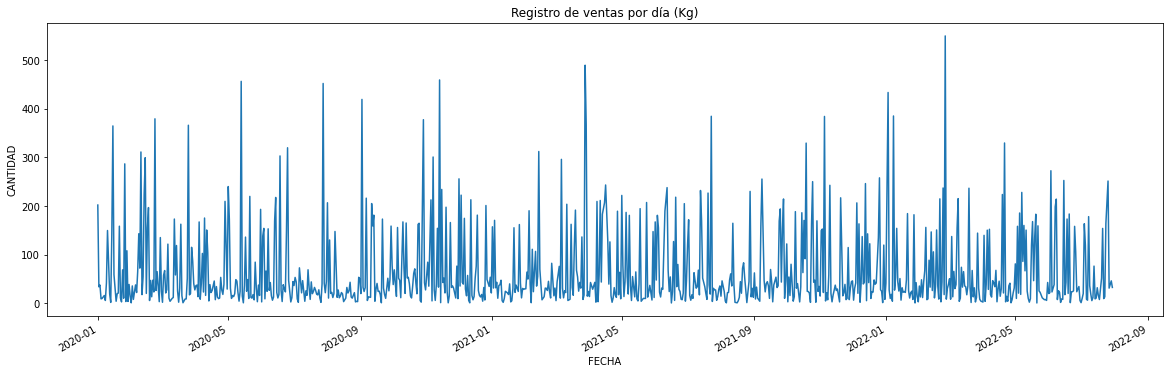

In [ ]:
df_ventas_day["CANTIDAD"].plot(figsize = (20,6))
plt.title("Registro de ventas por día (Kg)")
plt.ylabel("CANTIDAD")
plt.show()

In [ ]:
df_ventas_day["CANTIDAD"].describe()

count   889.000
mean     64.647
std      82.719
min       0.691
25%      13.448
50%      31.295
75%      68.278
max     550.047
Name: CANTIDAD, dtype: float64

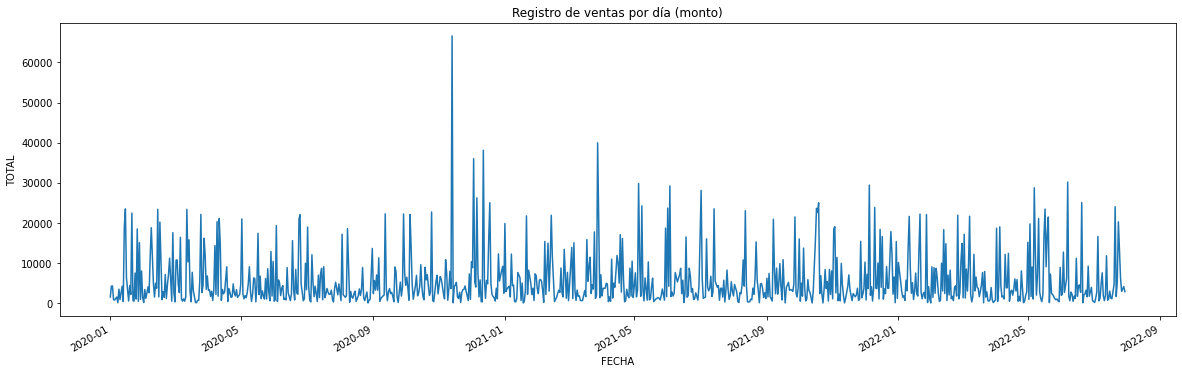

In [ ]:
df_ventas_day["TOTAL"].plot(figsize = (20,6))
plt.title("Registro de ventas por día (monto)")
plt.ylabel("TOTAL")
plt.show()

**Observación:**

La venta mayor fue de 550.47 kg
La venta minima fue de 0.691 kg


In [ ]:
df_productos_day = data.groupby(["PRODUCTO"]).sum()
df_productos_day

,ITEM,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD
PRODUCTO,,,,,,
ANCHO SIN HUESO GOLD WAGYU U.S.A,86963,25420.000,303258.969,54585.609,357844.562,872.792
ASADO DE TIRA CON HUESO ANGUS CHOICE USA,45686,3720.000,37847.469,6812.419,44659.887,372.166
BIFE ANCHO ANGUS HIGH CHOICE U.S.A,81270,9920.000,14976.472,2695.715,17672.188,110.451
BIFE ANCHO ARG,252685,18414.000,325886.406,58658.473,384544.875,3884.292
BIFE ANCHO CON HUESO ANGUS HIGH CHOICE U.S.A,81985,8680.000,953479.125,171623.094,1125102.125,8036.444
BIFE ANGOSTO ANGUS HIGH CHOICE U.S.A,82066,7130.000,20390.545,3670.231,24060.775,209.224
BIFE ANGOSTO ARG,254272,17856.000,265176.062,47730.812,312906.875,3259.447
CHORIZO CAPRESE 500 GR,41029,682.000,1718.919,309.400,2028.319,92.196
CHORIZO MERMELADA DE ROCOTO 500 GR,40133,682.000,1718.919,309.400,2028.319,92.196


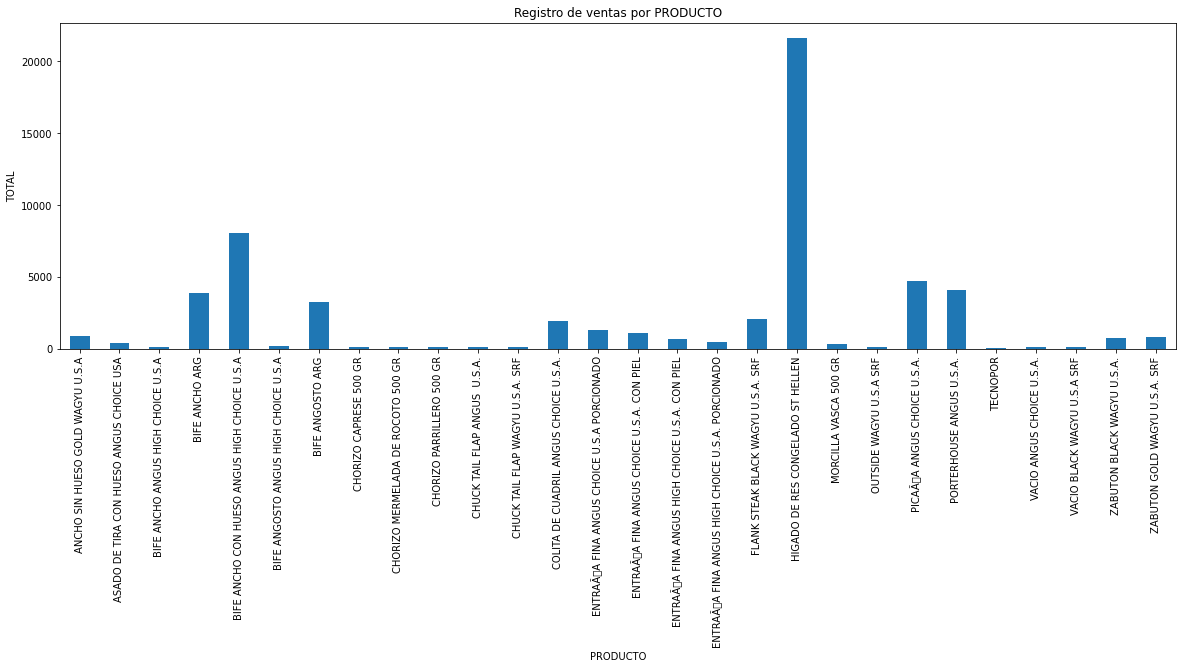

In [ ]:
df_productos_day["CANTIDAD"].plot.bar(figsize = (20,6))
plt.title("Registro de ventas por PRODUCTO")
plt.xticks(rotation=90)
plt.ylabel("TOTAL")
plt.show()

In [ ]:
data2 = data.copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FECHA            2697 non-null   datetime64[ns]
 1   ITEM             2697 non-null   int32         
 2   PRODUCTO         2697 non-null   object        
 3   PRECIO_UNITARIO  2697 non-null   float32       
 4   SUBTOTAL         2697 non-null   float32       
 5   IGV              2697 non-null   float32       
 6   TOTAL            2697 non-null   float32       
 7   CANTIDAD         2697 non-null   float32       
dtypes: datetime64[ns](1), float32(5), int32(1), object(1)
memory usage: 105.5+ KB


In [ ]:
data2["YEAR_MES"] = data2["FECHA"].dt.strftime("%Y-%d")
data2.head()

,FECHA,ITEM,PRODUCTO,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD,YEAR_MES
0,2020-01-01,1,ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO,160.000,296.501,53.369,349.871,2.187,2020-01
1,2020-01-01,2,HIGADO DE RES CONGELADO ST HELLEN,6.000,1016.539,182.974,1199.513,199.919,2020-01
2,2020-01-02,3,ENTRAÃA FINA ANGUS CHOICE U.S.A. CON PIEL,115.000,2294.744,413.046,2707.790,23.546,2020-02
3,2020-01-02,4,PICAÃA ANGUS CHOICE U.S.A.,80.000,373.280,67.189,440.469,5.506,2020-02
4,2020-01-02,5,VACIO BLACK WAGYU U.S.A SRF,220.000,919.560,165.518,1085.078,4.932,2020-02


In [ ]:
len(data2["YEAR_MES"].unique())

93

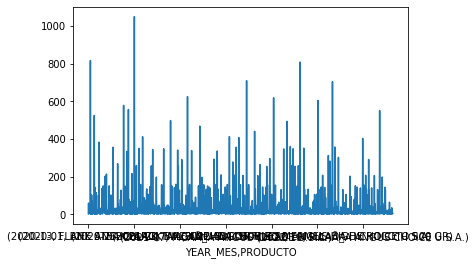

In [ ]:
#primero hacerla por mes
df_productos_day = data2.groupby(["YEAR_MES","PRODUCTO"])["CANTIDAD"].sum().plot()
df_productos_day

In [ ]:
data2.head()

,FECHA,ITEM,PRODUCTO,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD,YEAR_MES
0,2020-01-01,1,ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO,160.000,296.501,53.369,349.871,2.187,2020-01
1,2020-01-01,2,HIGADO DE RES CONGELADO ST HELLEN,6.000,1016.539,182.974,1199.513,199.919,2020-01
2,2020-01-02,3,ENTRAÃA FINA ANGUS CHOICE U.S.A. CON PIEL,115.000,2294.744,413.046,2707.790,23.546,2020-02
3,2020-01-02,4,PICAÃA ANGUS CHOICE U.S.A.,80.000,373.280,67.189,440.469,5.506,2020-02
4,2020-01-02,5,VACIO BLACK WAGYU U.S.A SRF,220.000,919.560,165.518,1085.078,4.932,2020-02


In [ ]:
!pip install skforecast==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 


In [ ]:
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
# from skforecast.utils import save_forecaster
# from skforecast.utils import load_forecaster

# Configuración warnings
# ==============================================================================
import warnings

In [ ]:
# Preparación del dato
# ==============================================================================
data3 = data2.copy()
data3['FECHA'] = pd.to_datetime(data3['FECHA'], format='%d/%m/%Y')
data3 = data3.set_index('FECHA')
data3 = data3.rename(columns={'x': 'y'})
data3 = data3.sort_index()
data3.head()

,ITEM,PRODUCTO,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD,YEAR_MES
FECHA,,,,,,,,
2020-01-01,1,ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO,160.000,296.501,53.369,349.871,2.187,2020-01
2020-01-01,2,HIGADO DE RES CONGELADO ST HELLEN,6.000,1016.539,182.974,1199.513,199.919,2020-01
2020-01-02,3,ENTRAÃA FINA ANGUS CHOICE U.S.A. CON PIEL,115.000,2294.744,413.046,2707.790,23.546,2020-02
2020-01-02,4,PICAÃA ANGUS CHOICE U.S.A.,80.000,373.280,67.189,440.469,5.506,2020-02
2020-01-02,5,VACIO BLACK WAGYU U.S.A SRF,220.000,919.560,165.518,1085.078,4.932,2020-02


In [ ]:
data3.describe()

,ITEM,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,CANTIDAD
count,2697.000,2697.000,2697.000,2697.000,2697.000,2697.000
mean,1349.000,130.103,1559.030,280.620,1839.650,21.309
std,778.701,86.449,2935.185,528.324,3463.509,41.665
min,1.000,6.000,45.117,8.121,53.238,0.667
25%,675.000,80.000,314.779,56.659,371.438,2.907
50%,1349.000,99.000,575.730,103.630,679.360,7.874
75%,2023.000,160.000,1385.026,249.300,1634.326,18.478
max,2697.000,410.000,18904.135,3402.682,22306.816,212.582


Fechas train : 2020-01-01 00:00:00 --- 2022-01-22 00:00:00  (n=2158)
Fechas test  : 2022-01-22 00:00:00 --- 2022-07-30 00:00:00  (n=539)


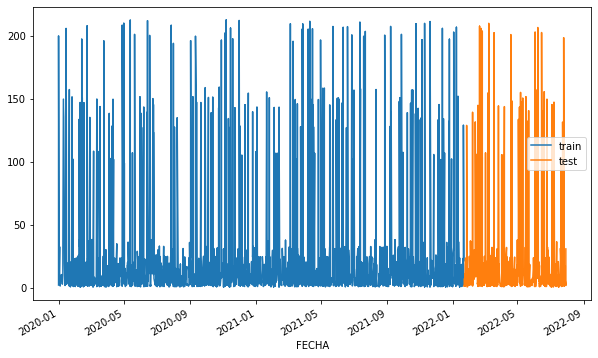

In [ ]:
steps = 539
datos_train = data3[:-steps]
datos_test  = data3[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(10, 6))
datos_train['CANTIDAD'].plot(ax=ax, label='train')
datos_test['CANTIDAD'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train['CANTIDAD'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 2157] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-11-25 00:31:50 
Last fit date: 2022-11-25 00:31:52 
Skforecast version: 0.4.2 

In [ ]:
# Predicciones
# ==============================================================================
steps = 36
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

2158   33.707
2159   22.813
2160   24.094
2161   22.062
2162   15.359
Name: pred, dtype: float64

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['CANTIDAD'].plot(ax=ax, label='train')
datos_test['CANTIDAD'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f76ae06d560> (for post_execute):


ValueError: ignored

ValueError: ignored

## **1.1 Armar un unico dataframe**

In [ ]:
train.head()

,ITEM,PRODUCTO,CANTIDAD,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,FECHA
0,1,ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. PORCIONADO,2.187,160.000,296.501,53.369,349.871,2020-01-01
1,2,HIGADO DE RES CONGELADO ST HELLEN,199.919,6.000,1016.539,182.974,1199.513,2020-01-01
2,3,ENTRAÃA FINA ANGUS CHOICE U.S.A. CON PIEL,23.546,115.000,2294.744,413.046,2707.790,2020-01-02
3,4,PICAÃA ANGUS CHOICE U.S.A.,5.506,80.000,373.280,67.189,440.469,2020-01-02
4,5,VACIO BLACK WAGYU U.S.A SRF,4.932,220.000,919.560,165.518,1085.078,2020-01-02


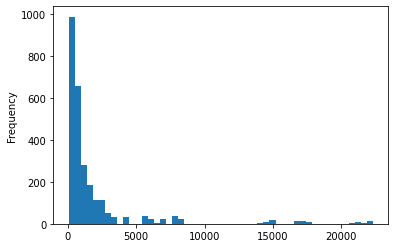

In [ ]:
train.TOTAL.plot.hist(bins=50)
plt.show()

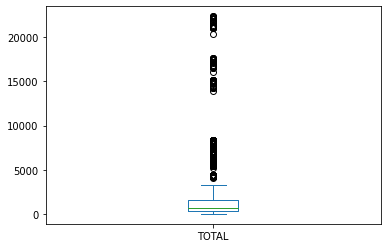

In [ ]:
train.TOTAL.plot.box()
plt.show()

In [ ]:
train.loc[train.TOTAL<0,:]

,ITEM,PRODUCTO,CANTIDAD,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,FECHA


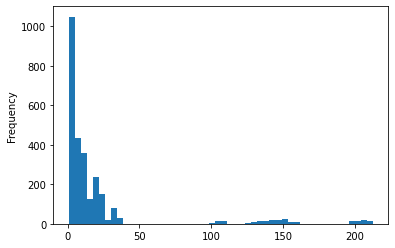

In [ ]:
train.CANTIDAD.plot.hist(bins=50)
plt.show()

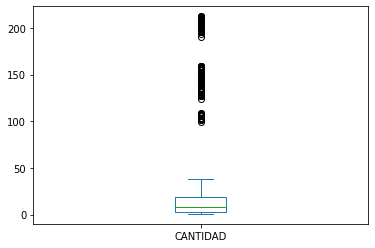

In [ ]:
train.CANTIDAD.plot.box()
plt.show()

In [ ]:
train.loc[train.CANTIDAD<0,:]

,ITEM,PRODUCTO,CANTIDAD,PRECIO_UNITARIO,SUBTOTAL,IGV,TOTAL,FECHA


# **2. Análisis Exploratorio**

In [ ]:
train2 = train.copy()

In [ ]:
train2.FECHA.describe(datetime_is_numeric=True)

count                             2697
mean     2021-04-19 14:36:42.447163648
min                2020-01-01 00:00:00
25%                2020-08-31 00:00:00
50%                2021-04-20 00:00:00
75%                2021-12-12 00:00:00
max                2022-07-30 00:00:00
Name: FECHA, dtype: object

In [ ]:
train2.groupby(train2.FECHA.dt.year)['CANTIDAD'].sum()

FECHA
2020   22175.549
2021   22351.148
2022   12944.666
Name: CANTIDAD, dtype: float32

In [ ]:
train2.groupby([(train2.FECHA.dt.year),(train2.FECHA.dt.month)])['CANTIDAD'].sum()

FECHA  FECHA
2020   1       1847.609
       2       2438.440
       3       1679.268
       4       1465.188
       5       2014.029
       6       2093.099
       7       1338.413
       8        974.034
       9       2061.114
       10      2035.385
       11      2311.386
       12      1917.583
2021   1       1270.465
       2       1408.657
       3       2541.824
       4       2182.255
       5       1695.145
       6       2056.582
       7       1960.463
       8       1159.413
       9       1991.948
       10      2279.230
       11      1703.951
       12      2101.214
2022   1       1949.630
       2       2181.543
       3       1611.769
       4       1595.831
       5       2160.375
       6       1958.808
       7       1486.710
Name: CANTIDAD, dtype: float32

In [ ]:
train2.groupby([(train2.PRODUCTO)])['CANTIDAD'].sum()

PRODUCTO
ANCHO SIN HUESO GOLD WAGYU U.S.A                      872.792
ASADO DE TIRA CON HUESO ANGUS CHOICE USA              372.166
BIFE ANCHO ANGUS HIGH CHOICE U.S.A                    110.451
BIFE ANCHO ARG                                       3884.292
BIFE ANCHO CON HUESO ANGUS HIGH CHOICE U.S.A         8036.444
BIFE ANGOSTO ANGUS HIGH CHOICE U.S.A                  209.224
BIFE ANGOSTO ARG                                     3259.447
CHORIZO CAPRESE 500 GR                                 92.196
CHORIZO MERMELADA DE ROCOTO 500 GR                     92.196
CHORIZO PARRILLERO 500 GR                              92.196
CHUCK TAIL FLAP ANGUS  U.S.A.                         131.226
CHUCK TAIL FLAP WAGYU U.S.A. SRF                      124.834
COLITA DE CUADRIL ANGUS CHOICE U.S.A.                1907.265
ENTRAÃA FINA ANGUS CHOICE U.S.A PORCIONADO          1274.798
ENTRAÃA FINA ANGUS CHOICE U.S.A. CON PIEL           1065.605
ENTRAÃA FINA ANGUS HIGH CHOICE U.S.A. CON PIEL       710.956

In [ ]:
train2.groupby([(train2.PRODUCTO)])['CANTIDAD'].sum().head(5)

PRODUCTO
ANCHO SIN HUESO GOLD WAGYU U.S.A                872.792
ASADO DE TIRA CON HUESO ANGUS CHOICE USA        372.166
BIFE ANCHO ANGUS HIGH CHOICE U.S.A              110.451
BIFE ANCHO ARG                                 3884.292
BIFE ANCHO CON HUESO ANGUS HIGH CHOICE U.S.A   8036.444
Name: CANTIDAD, dtype: float32

* Agrupar los datos por fecha, meses
graficas.
* Analizar tendencias
* Explorar Determinar tiendas que venden más
* Determinar el producto de mayor demanda en general
*  Determinar el producto de mayor demanda en general por tienda
* Determinar las categorias de productos de mayor demanda en general por tienda
* revisar si existen outliers y eliminarlos
* analisis de correlacion entre la cantidad vendidad (luego de crear un dataset agrupado por meses)
* Ing. de caracteristicas.
   - escalar los datos
   - generar nuevas variables en funcion de las que ya existen
* Algoritmo de ML
* dataset agrupado
 - forecasting:
   fecha, cantidad
 - regresion:
   todas las variables, cantidad

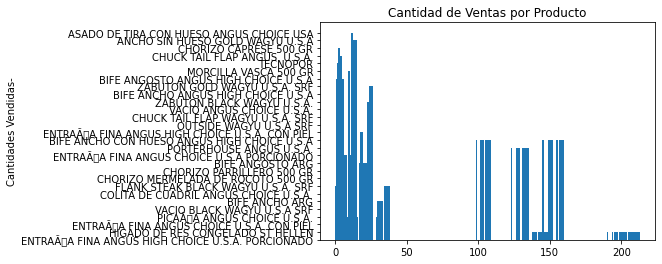

In [ ]:
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Cantidades Vendidas-')
#Colocamos una etiqueta en el eje X
ax.set_title('Cantidad de Ventas por Producto')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(train2.CANTIDAD, train2.PRODUCTO)
#Finalmente mostramos la grafica con el metodo show()
plt.show()

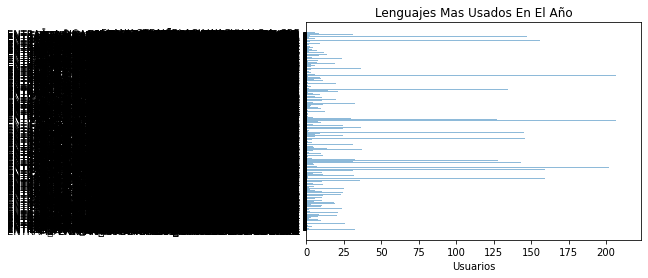

In [ ]:
PRODUCTOS = train2.PRODUCTO
#Obtenemos una lista con las posiciones de cada lenguaje, ejemplo 0, 1, 2, 3.....
y_pos = np.arange(len(PRODUCTOS))

#Ahora obtenemos la cantidad de usos de cada lenguaje
CANTIDADES = train2.CANTIDAD

#Creamos la grafica pasando los valores en el eje X, Y, donde X = cantidad_usos y Y = lenguajes
plt.barh(y_pos, CANTIDADES, align='center', alpha=0.5)
#Añadimos la etiqueta de nombre de cada lenguaje en su posicion correcta
plt.yticks(y_pos, PRODUCTOS)
#añadimos una etiqueta en el eje X
plt.xlabel('Usuarios')
#Y una etiqueta superior
plt.title('Lenguajes Mas Usados En El Año')
plt.savefig('barras_horizontal.png')
plt.show()